# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [125]:
import os
import re
#!pip install emoji
import emoji
import pandas as pd
import numpy as np
import matplotlib as py

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

try:
    sw = stopwords.words("english")
except:
    from nltk import download as nltkdl
    nltkdl('stopwords')
    sw =  stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [126]:
# Add any additional import statements you need here




In [127]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/sheri/Documents/Github/RihannaKaty"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [128]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = len("".join(tokens))
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens,num_unique_tokens,num_characters,
            lexical_diversity])
    

In [172]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(descriptive_stats(text, verbose=False)[2] == 55)
assert(abs(descriptive_stats(text, verbose=False)[3] - 0.69) < 0.02)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


In [130]:
stats = descriptive_stats(text, verbose=True)
assert stats[0]==13
assert stats[1]==9
assert stats[2]==55
assert abs(stats[3] - 0.69) < 0.02

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: It is shorter than an if then statement and it allows us to see if there is an error in our code. It allows us to see if the variables are where they should be. There is an error in the above code because descriptive stats does not equal 13.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [131]:
# Read in the lyrics data
songDFS={}
for artist in os.listdir("lyrics"):
    artist_path=os.path.join('lyrics',artist)
    for lyric_file in os.listdir(artist_path):
        artist_path=os.path.join('lyrics',artist,lyric_file)
        f=open(artist_path,'r')
        artist_song=lyric_file.replace('.txt','').split('_')
        songDFS[artist_song[0],artist_song[1]]=f.read()
        f.close()


In [132]:
songDFS_backup=songDFS

In [149]:
# Read in the twitter data
artists = ['rihanna', 'taylorswift13']
twitterDFS = {}
for artist in artists:
    filePath = os.path.join("twitter", f'{artist}_followers_data.txt')
    twitterDFS[artist] = pd.read_csv(filePath,delimiter='\t')['description'].dropna().tolist()

twitterDFS

{'rihanna': ['Fancy seeing you here🦋',
  '22',
  'Great is the faithfulness of GOD to me🎇',
  'Lover of God||Medical Laboratory Scientist||Quality health advocate||Fashion designer.',
  'A hard working mommy of 7 w.w.J.d',
  'Hello Hell',
  'HON. DISH USAF VEITNAM VETERAN NURSE DAD ...',
  'Qualquer problema que você tiver comigo, é seu!🖤',
  "Don't be special, that's what im here for",
  'Swimming',
  'A Queen👸🏼| Denim Connoisseur| Video Editor 🎞|https://t.co/ZAAcvNRzqS',
  'YOLO',
  'LA REALITE ESY QUE SIDIBE NE JOUE PAS DE SON INTERET ET....',
  'Lol',
  '🥀.',
  'Nigerian Student nurse',
  '❤️\u200d🔥✌️💃💋❣️⚡️💃💥',
  'تعااارف ،، صداااقة ، فرررنددز ،، فااانز🔥🌹💐🤍❤️🤩😍🤣🥰👩\u200d❤️\u200d👨🌻',
  '...',
  'Music collection old coins an paper money artist photography right small rap tunes',
  '𝕯𝖔𝖓‘𝖙 𝖉𝖔 𝖎𝖙 𝖋𝖔𝖗 𝖋𝖆𝖒𝖊, 𝖉𝖔 𝖎𝖙 𝖋𝖔𝖗 𝖎𝖒𝖕𝖆𝖈𝖙” (ele/dele)',
  'Italian',
  'Straight to the point',
  "I'm tanzania musician....",
  'Currently a student at BYUI studying early childhood/Special Ed',
  'AbdoXHamm

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [135]:
punctuation = set(punctuation) # speeds up comparison


In [150]:
twitterDFS.keys()

dict_keys(['rihanna', 'taylorswift13'])

In [170]:
# create your clean twitter data here
twitterDFS_2={}
for k, v in twitterDFS.items():
    s = " ".join(ch for ch in v if ch not in punctuation)
    s = s.lower().replace('\n',' ')
    words = s.split(' ')
    words = [w for w in words if w !='']
    s = [w for w in words if w not in sw]
    twitterDFS_2[k] = s

twitterDFS_2

{'rihanna': ['fancy',
  'seeing',
  'here🦋',
  '22',
  'great',
  'faithfulness',
  'god',
  'me🎇',
  'lover',
  'god||medical',
  'laboratory',
  'scientist||quality',
  'health',
  'advocate||fashion',
  'designer.',
  'hard',
  'working',
  'mommy',
  '7',
  'w.w.j.d',
  'hello',
  'hell',
  'hon.',
  'dish',
  'usaf',
  'veitnam',
  'veteran',
  'nurse',
  'dad',
  '...',
  'qualquer',
  'problema',
  'que',
  'você',
  'tiver',
  'comigo,',
  'é',
  'seu!🖤',
  'special,',
  "that's",
  'im',
  'swimming',
  'queen👸🏼|',
  'denim',
  'connoisseur|',
  'video',
  'editor',
  '🎞|https://t.co/zaacvnrzqs',
  'yolo',
  'la',
  'realite',
  'esy',
  'que',
  'sidibe',
  'ne',
  'joue',
  'pas',
  'de',
  'son',
  'interet',
  'et....',
  'lol',
  '🥀.',
  'nigerian',
  'student',
  'nurse',
  '❤️\u200d🔥✌️💃💋❣️⚡️💃💥',
  'تعااارف',
  '،،',
  'صداااقة',
  '،',
  'فرررنددز',
  '،،',
  'فااانز🔥🌹💐🤍❤️🤩😍🤣🥰👩\u200d❤️\u200d👨🌻',
  '...',
  'music',
  'collection',
  'old',
  'coins',
  'paper',
  'money

In [114]:
# create your clean lyrics data here
songDFS_2={}
for k, v in songDFS.items():
    s= "".join(ch for ch in v if ch not in punctuation)
    s=s.lower().replace('\n',' ')
    words=s.split(' ')
    words=[w for w in words if w !='']
    s= [w for w in words if w not in sw]
    songDFS_2[k]=s

songDFS_2

{('rihanna', 'breakitoff'): ['break',
  'breaking',
  'setting',
  'real',
  'way',
  'making',
  'girls',
  'chill',
  'mind',
  'making',
  'good',
  'time',
  'ya',
  'man',
  'spz',
  'yo',
  'long',
  'side',
  'riri',
  'come',
  'rihanna',
  'tek',
  'tek',
  'girl',
  'break',
  'boy',
  'cause',
  'youve',
  'got',
  'feeling',
  'naughty',
  'wanna',
  'know',
  'boy',
  'could',
  'ya',
  'shorty',
  'definitely',
  'set',
  'boy',
  'make',
  'hot',
  'body',
  'break',
  'take',
  'miss',
  'take',
  'break',
  'tonight',
  'yo',
  'break',
  'boy',
  'cause',
  'youve',
  'got',
  'feeling',
  'naughty',
  'wanna',
  'know',
  'boy',
  'could',
  'ya',
  'shorty',
  'yo',
  'yo',
  'set',
  'boy',
  'yeah',
  'yeah',
  'make',
  'hot',
  'body',
  'break',
  'tonight',
  'yo',
  'yo',
  'struggle',
  'pain',
  'feel',
  'want',
  'good',
  'man',
  'give',
  'style',
  'wild',
  'child',
  'dere',
  'pon',
  'file',
  'long',
  'time',
  'wha',
  'plow',
  'sile',
  'plow

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [157]:
songDFS_3 = {}

for key, val in songDFS_2.items():
    if key[0] in songDFS_3:
        songDFS_3[key[0]] += val
    else:
        songDFS_3[key[0]] = []

In [158]:
songDFS_3.keys()

dict_keys(['rihanna', 'taylorswift'])

In [171]:
# calls to descriptive_stats here
for key, val in songDFS_3.items():
    print(f'Lyric for {key}')
    descriptive_stats(val)
    print()

for key, val in twitterDFS_2.items():
    print(f'Twitter for {key}')
    descriptive_stats(val)
    print()

Lyric for rihanna
There are 5670 tokens in the data.
There are 809 unique tokens in the data.
There are 24821 characters in the data.
The lexical diversity is 0.143 in the data.

Lyric for taylorswift
There are 2983 tokens in the data.
There are 735 unique tokens in the data.
There are 14708 characters in the data.
The lexical diversity is 0.246 in the data.

Twitter for rihanna
There are 10558 tokens in the data.
There are 284 unique tokens in the data.
There are 62286 characters in the data.
The lexical diversity is 0.027 in the data.

Twitter for taylorswift13
There are 12910 tokens in the data.
There are 336 unique tokens in the data.
There are 72495 characters in the data.
The lexical diversity is 0.026 in the data.



Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: 

I think that the top 5 words would be a combination of the stopwords because stopwords are used frequently. 

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Taylor Swift has a higher lexical diversity which means that she uses more unique words than Rihanna. However the values for the lexical diversity are similar. Taylor swift has 0.246 while Rihanna has 0.143. Both singers are modern pop artists that write about love so I expected similar numbers. 


## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [177]:
def is_emoji(s):
    return(s in emoji.UNICODE_EMOJI['en'])

assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

In [185]:
len(emoji.UNICODE_EMOJI['en'])

4702

In [189]:
print("\U000e007f")

󠁿


### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [182]:
# Your code here
for key, val in twitterDFS_2.items():
    d = Counter([x for x in val if is_emoji(x)])
    print(f'Top 10 most common emojis for {key}:')
    print(d.most_common(10))
    print()

Top 10 most common emojis for rihanna:
[('💋', 82), ('👀', 55), ('✌️', 51), ('☮️', 51), ('♍', 51), ('🆔', 51), ('🔞', 51), ('😎', 51), ('❣️', 51), ('♥️', 51)]

Top 10 most common emojis for taylorswift13:
[('💖', 56), ('❤️', 55), ('♌', 51), ('🦄', 49), ('👇🏻', 49), ('🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f', 27), ('🍄', 26), ('🌱', 24), ('💙', 23), ('💉', 21)]



### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [190]:
# Your code here
for key, val in twitterDFS_2.items():
    d = Counter([x for x in val if "#" in x])
    print(f'Top 10 most common emojis for {key}:')
    print(d.most_common(10))
    print()

Top 10 most common emojis for rihanna:
[('#djcamron🅿️🔊', 34)]

Top 10 most common emojis for taylorswift13:
[('#mapoli', 51), ('#dwhap', 49), ('#bussin', 49), ('#blickblick', 49), ('#fczenit', 30), ('#barcelona', 30), ('#bayern', 30), ('#hcska', 30), ('#chicagoblackhawks', 30)]



In [ ]:
emoji_df = {}
for key, val in twitterDFS_2.items():
    d = Counter([x for x in val if "#" in x])
    print(f'Top 10 most common emojis for {key}:')
    print(d.most_common(10))
    print()

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [102]:
# Your code here
#titles = {k[1]:0 for k songDFS.keys()}
titles={}
for artist in os.listdir("lyrics"):
    artist_path=os.path.join('lyrics',artist)
    for lyric_file in os.listdir(artist_path):
        artist_path=os.path.join('lyrics',artist,lyric_file)
        f=open(artist_path,'r')
        title_line=f.readline()
        title_line=title_line.lower().strip()
        s= [w for w in title_line.split(' ') if w not in sw]
        for word in s:
            if word in titles: 
                titles[word]+=1
            else:
                titles[word]=1
    print(artist)
    print(sorted(titles.items(),key=lambda x: x[1],reverse=True))
    titles={}

rihanna
[('love', 2), ('pon', 2), ('de', 2), ('replay', 2), ('la,', 2), ('break', 1), ('crazy', 1), ('little', 1), ('thing', 1), ('called', 1), ('dem', 1), ('haters', 1), ('final', 1), ('goodbye', 1), ('go', 1), ("lovin'", 1), ('want', 1), ('kisses', 1), ('lie', 1), ('let', 1), ('music', 1), ('sun', 1), ('know', 1), ('(remix)', 1), ('rush', 1), ('selfish', 1), ('girl', 1), ('sos', 1), ('la', 1), ('last', 1), ('time', 1), ("there's", 1), ('thug', 1), ('life', 1), ('unfaithful', 1), ('ride', 1), ('willing', 1), ('wait', 1), ('(no,', 1), ('no,', 1), ('no)', 1)]
taylorswift
[('christmas', 3), ("i'm", 2), ('song', 2), ('perfectly', 1), ('good', 1), ('heart', 1), ('place', 1), ('world', 1), ('christmases', 1), ('mine', 1), ('must', 1), ('something', 1), ('cold', 1), ('invisible', 1), ('jump', 1), ('fall', 1), ('last', 1), ("mary's", 1), ('(oh', 1), ('my)', 1), ('picture', 1), ('burn', 1), ('santa', 1), ('baby', 1), ('said', 1), ('silent', 1), ('night', 1), ('stay', 1), ('beautiful', 1), ('te

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
rihanna        AxesSubplot(0.125,0.125;0.775x0.755)
taylorswift    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

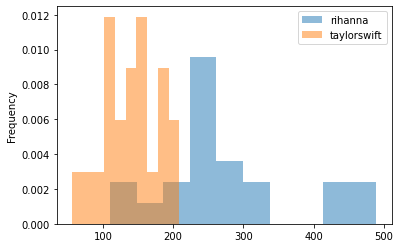

In [117]:
#! pip install matplotlib
import matplotlib as py 
num_songs = 22
artist_list=[]
token_length_list=[]
for k,v in songDFS_2.items():
    artist_list.append(k[0])
    token_length_list.append(len(v))

df = pd.DataFrame({
    "artist":artist_list, #['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length": token_length_list #np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: 


In [118]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [122]:
# Your lyric length comparison chart here. 

songDFS_3={}
for k, v in songDFS.items():
    s= "".join(ch for ch in v if ch not in punctuation)
    s=s.lower()
    words=tokenize_lyrics(s)
    s= [w for w in words if w not in sw]
    songDFS_3[k]=s

songDFS_3

{('rihanna', 'breakitoff'): ['break',
  'breaking',
  'setting',
  'real',
  'way',
  'making',
  'girls',
  'chill',
  'mind',
  'making',
  'good',
  'time',
  'ya',
  'man',
  'spz',
  'yo',
  'long',
  'side',
  'riri',
  'come',
  'rihanna',
  'tek',
  'tek',
  'girl',
  'break',
  'boy',
  'cause',
  'youve',
  'got',
  'feeling',
  'naughty',
  'wanna',
  'know',
  'boy',
  'could',
  'ya',
  'shorty',
  'definitely',
  'set',
  'boy',
  'make',
  'hot',
  'body',
  'break',
  'take',
  'miss',
  'take',
  'break',
  'tonight',
  'yo',
  'break',
  'boy',
  'cause',
  'youve',
  'got',
  'feeling',
  'naughty',
  'wanna',
  'know',
  'boy',
  'could',
  'ya',
  'shorty',
  'yo',
  'yo',
  'set',
  'boy',
  'yeah',
  'yeah',
  'make',
  'hot',
  'body',
  'break',
  'tonight',
  'yo',
  'yo',
  'struggle',
  'pain',
  'feel',
  'want',
  'good',
  'man',
  'give',
  'style',
  'wild',
  'child',
  'dere',
  'pon',
  'file',
  'long',
  'time',
  'wha',
  'plow',
  'sile',
  'plow

In [124]:
len_compare={}
for k in songDFS.keys():
    len_compare[k]=[len(songDFS_2[k]),len(songDFS_3[k])]
len_compare

{('rihanna', 'breakitoff'): [434, 435],
 ('rihanna', 'crazylittlethingcalledlove'): [271, 272],
 ('rihanna', 'demhaters'): [210, 211],
 ('rihanna', 'finalgoodbye'): [110, 111],
 ('rihanna', 'hereigoagain'): [225, 226],
 ('rihanna', 'ifitslovinthatyouwant'): [242, 243],
 ('rihanna', 'kissesdontlie'): [327, 328],
 ('rihanna', 'letme'): [289, 290],
 ('rihanna', 'musicofthesun'): [247, 248],
 ('rihanna', 'nowiknow'): [138, 139],
 ('rihanna', 'pondereplay'): [427, 428],
 ('rihanna', 'pondereplayremix'): [465, 466],
 ('rihanna', 'rush'): [246, 247],
 ('rihanna', 'selfishgirl'): [256, 257],
 ('rihanna', 'sosrescueme'): [331, 332],
 ('rihanna', 'thatlalala'): [489, 490],
 ('rihanna', 'thelasttime'): [241, 242],
 ('rihanna', 'theresathuginmylife'): [246, 247],
 ('rihanna', 'unfaithful'): [173, 174],
 ('rihanna', 'weride'): [289, 290],
 ('rihanna', 'willingtowait'): [208, 209],
 ('rihanna', 'youdontlovemenonono'): [240, 241],
 ('taylorswift', 'aperfectlygoodheart'): [125, 126],
 ('taylorswift', 